# Script básico para graficar respuestas al escalón

Paquetes necesarios:
* [`control`](https://pypi.org/project/control/)
* [`matlplotlib`](https://pypi.org/project/matplotlib/)

El paquete `control` incluye un módulo de compatibilidad con matlab
tiene funciones análogas, con los mismos nombres, pero no es completamente
igual función por función. Importamos el módulo `matlab` bajo el nombre `m`.

In [1]:
from control import matlab as m

Una de las funciones que presenta prácticamente el mismo comportamiento es
`tf`. Con "s" o "z" devuelve una función de transferencia continua o 
discreta, respectivamente.

In [2]:
s = m.tf("s")
s  # mostramos el contenido de la variable s (s solita)

TransferFunction(array([1, 0]), array([1]))

La sintaxis acá es similar a la de matlab, se usan dos asteriscos para las
potencias (`**`), no una cuña (`^`).

In [3]:
tau1, tau2 = 3, 200
kp = 1.8/(15*tau2)
sys =                 kp/(
    s**2 + s*(1/tau1)+(1/tau2) + 1/(tau1*tau2))
sys  # Mostramos la representación del sistema (contenido de la variable `sys`)

TransferFunction(array([0.0006]), array([1.        , 0.33333333, 0.00666667]))

A diferencia de la función `step` de matlab, esta nos devuelve
la serie temporal en lugar de hacer el gráfico, por eso recurrimos
a la función `plot` del módulo `pyplot` del paquete `matplotlib`
para graficar la respuesta. 

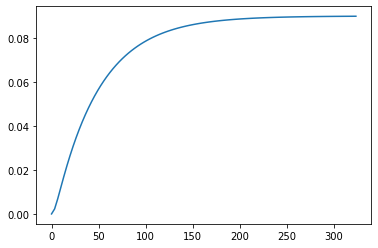

In [4]:
from matplotlib import pyplot as plt

resp, t = m.step(sys)

plt.plot(t, resp)

En una notebook de jupyter, se puede obtener la documentación
para alguna función, módulo u otro tipo de objeto colocando un signo
de pregunta (`?`) al final de la línea. En una sesión interactiva común
se puede utilizar la función `help`, a mismo efecto.

In [5]:
help(m.step)

Help on function step in module control.matlab.timeresp:

step(sys, T=None, X0=0.0, input=0, output=None, return_x=False)
    Step response of a linear system
    
    If the system has multiple inputs or outputs (MIMO), one input has
    to be selected for the simulation.  Optionally, one output may be
    selected. If no selection is made for the output, all outputs are
    given. The parameters `input` and `output` do this. All other
    inputs are set to 0, all other outputs are ignored.
    
    Parameters
    ----------
    sys: StateSpace, or TransferFunction
        LTI system to simulate
    
    T: array-like or number, optional
        Time vector, or simulation time duration if a number (time vector is
        autocomputed if not given)
    
    X0: array-like or number, optional
        Initial condition (default = 0)
    
        Numbers are converted to constant arrays with the correct shape.
    
    input: int
        Index of the input that will be used in this simula

In [6]:
m.step?

Finalmente, se pueden obtener gráficos más completos utilizando las
distintas funciones del módulo `pyplot`. La documentación para los módulos de
los paquetes mencionados puede encontrase en la página de PyPi (Python Package Index)
bajo "Project Links" -> "Homepage", cuyos enlaces se listan al
principio de este documento.

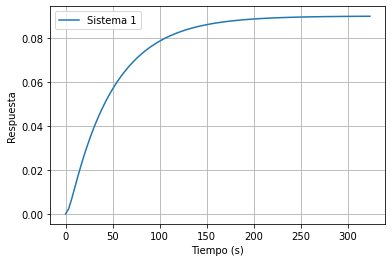

In [7]:
plt.plot(t, resp, label="Sistema 1")

plt.xlabel("Tiempo (s)")
plt.ylabel("Respuesta")
plt.grid()
plt.legend()